In [3]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem
from scipy.io import loadmat
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import ttest_rel
import statsmodels.api as sm
default_img_set()

In [4]:
with open('../Results/FanoFactor_property.pkl', 'rb') as f:
    Metrics2 = pickle.load(f)
with open('../Results/Signal_Noise_Correlation.pkl', 'rb') as f:
    Metrics = pickle.load(f)
FF_previous = np.array([[-79.492  ,   1.03279],
                        [-56.3    ,   1.06557],
                        [-33.016  ,   0.95574],
                        [ -9.726  ,   0.83443],
                        [ 13.104  ,   0.83934],
                        [ 35.865  ,   0.95246],
                        [ 60.152  ,   1.06066],
                        [ 83.759  ,   1.03934]])
Signal_Noise_previous = np.array([[-0.7601  ,   0.207113],
                                  [-0.55875 ,   0.208368],
                                  [-0.36372 ,   0.178243],
                                  [-0.16463 ,   0.18954],
                                  [0.03436  ,   0.198326],
                                  [0.23866  ,   0.208996],
                                  [0.43445  ,   0.200837],
                                  [0.63642  ,   0.219665],
                                  [0.83106  ,   0.253556],
                                  [1.00000  ,   0.325105]])

In [5]:
ref_list = [35, 55, 125, 145]
rep_list = np.arange(0, 10, 1)
contrast_levels = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
noise_levels = [0.005, 1, 5, 10, 15, 30, 50, 75]
N_neuron = [96, 256, 384, 384, 256]
layers = ["conv1", "conv2", "conv3", "conv4", "conv5"]
CW_CCW = ["CW", "CCW"]
N_CW_CCW = len(CW_CCW)
N_layers = len(layers)
N_noise = len(noise_levels)
N_contrast = len(contrast_levels)
N_rep = len(rep_list)
N_ref = len(ref_list)

In [6]:
bin_edges = np.linspace(-0.90,0.90,20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
SingleNoiseCorrelation_pre = [[[[[[] for _ in range(N_CW_CCW)] for _ in range(N_noise)] for _ in range(N_contrast)]for _ in range(len(ref_list))] for _ in range(N_layers)]
SingleNoiseCorrelation_post = [[[[[[] for _ in range(N_CW_CCW)] for _ in range(N_noise)] for _ in range(N_contrast)]for _ in range(len(ref_list))] for _ in range(N_layers)]

for i_ref, ref_ori in enumerate(ref_list):
    for i_layer in range(N_layers):
        for i_contrast, _ in enumerate(contrast_levels):
            for i_noise, _ in enumerate(noise_levels):
                for i_CW_CCW in range(N_CW_CCW):
                    for i in range(len(bin_edges) - 1):
                        mask = (Metrics['TuningSimilarity_Pre'][i_layer][i_ref][i_contrast][i_noise][i_CW_CCW] >= bin_edges[i]) & (Metrics['TuningSimilarity_Pre'][i_layer][i_ref][i_contrast][i_noise][i_CW_CCW] < bin_edges[i + 1])
                        bin_mean = np.mean(Metrics['NoiseCorrelation_Pre'][i_layer][i_ref][i_contrast][i_noise][i_CW_CCW][mask])
                        SingleNoiseCorrelation_pre[i_layer][i_ref][i_contrast][i_noise][i_CW_CCW].append(bin_mean)
                        
                        mask = (Metrics['TuningSimilarity_Post'][i_layer][i_ref][i_contrast][i_noise][i_CW_CCW] >= bin_edges[i]) & (Metrics['TuningSimilarity_Post'][i_layer][i_ref][i_contrast][i_noise][i_CW_CCW] < bin_edges[i + 1])
                        bin_mean = np.mean(Metrics['NoiseCorrelation_Post'][i_layer][i_ref][i_contrast][i_noise][i_CW_CCW][mask])
                        SingleNoiseCorrelation_post[i_layer][i_ref][i_contrast][i_noise][i_CW_CCW].append(bin_mean)
                        
SingleNoiseCorrelation_pre = np.array(SingleNoiseCorrelation_pre)
SingleNoiseCorrelation_post = np.array(SingleNoiseCorrelation_post)


In [7]:
FF_property_pre_mean = np.array(Metrics2['FanoFactor_property_Pre']).mean(axis=(2,3)).mean(axis=1)
FF_property_pre_se = sem(np.array(Metrics2['FanoFactor_property_Pre']).mean(axis=(2,3)), axis=1)
FF_property_post_mean = np.array(Metrics2['FanoFactor_property_Post']).mean(axis=(2,3)).mean(axis=1)
FF_property_post_se = sem(np.array(Metrics2['FanoFactor_property_Post']).mean(axis=(2,3)), axis=1)
SingleNoiseCorrelation_pre_mean = SingleNoiseCorrelation_pre.mean(axis=(2,3,4)).mean(axis=1)
SingleNoiseCorrelation_pre_se = sem(SingleNoiseCorrelation_pre.mean(axis=(2,3,4)), axis=1)
SingleNoiseCorrelation_post_mean = SingleNoiseCorrelation_post.mean(axis=(2,3,4)).mean(axis=1)
SingleNoiseCorrelation_post_se = sem(SingleNoiseCorrelation_post.mean(axis=(2,3,4)), axis=1)

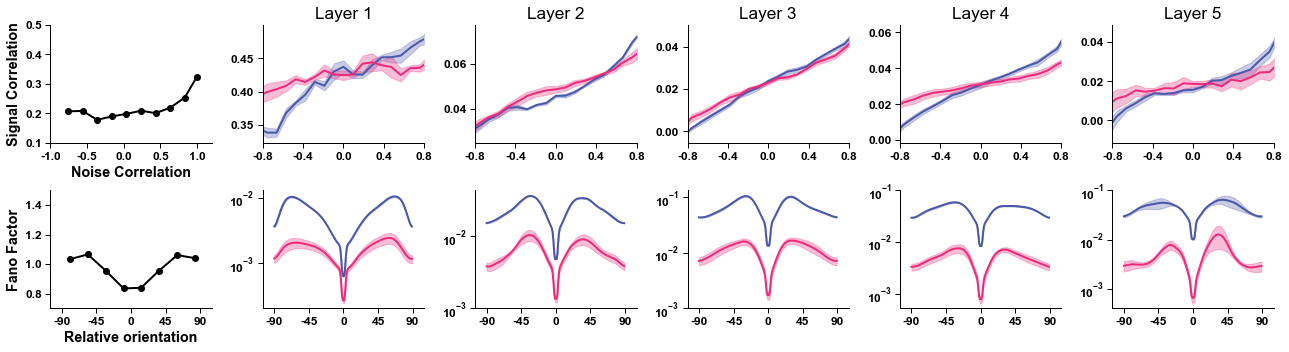

In [41]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

fig, ax = plt.subplots(2, 6, figsize=(18, 5))

plt.sca(ax[0,0])
plot(Signal_Noise_previous[:,0], Signal_Noise_previous[:,1], color='k',fmt='-o')
ax[0,0].set_xlim([-1.0, 1.2])
ax[0,0].set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax[0,0].set_ylim([0.1,0.5])
ax[0,0].set_ylabel("Signal Correlation")
ax[0,0].set_xlabel("Noise Correlation")
for i in range(1,6,1):
    plt.sca(ax[0,i])
    ax[0,i].plot(bin_centers, SingleNoiseCorrelation_pre_mean[i-1], label=['Pre-test'],c=ryzcolor(0))
    ax[0,i].fill_between(bin_centers,SingleNoiseCorrelation_pre_mean[i-1]-SingleNoiseCorrelation_pre_se[i-1],
                        SingleNoiseCorrelation_pre_mean[i-1]+SingleNoiseCorrelation_pre_se[i-1], color=C0_alpha)
    ax[0,i].plot(bin_centers, SingleNoiseCorrelation_post_mean[i-1], label=['Post-test'],c=ryzcolor(1))
    ax[0,i].fill_between(bin_centers,SingleNoiseCorrelation_post_mean[i-1]-SingleNoiseCorrelation_post_se[i-1],
                        SingleNoiseCorrelation_post_mean[i-1]+SingleNoiseCorrelation_post_se[i-1], color=C1_alpha)
    ax[0,i].set_title("Layer "+str(i))
    ax[0,i].set_xlim([-0.8,0.8])
    ax[0,i].set_xticks([-0.8,-0.4,0,0.4,0.8])

plt.sca(ax[1,0])
plot(FF_previous[:,0], FF_previous[:,1], color='k',fmt='-o')
ax[1,0].set_xlim([-105,105])
ax[1,0].set_xticks([-90,-45,0,45,90])
ax[1,0].set_yticks([0.8,1.0,1.2,1.4])
ax[1,0].set_ylim([0.7,1.5])
ax[1,0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[1,0].set_ylabel("Fano Factor")
ax[1,0].set_xlabel("Relative orientation")
for i in range(1,6,1):
    plt.sca(ax[1,i])
    ax[1,i].plot(np.arange(0,180,1), FF_property_pre_mean[i-1], label=['Pre-test'],c=ryzcolor(0))
    ax[1,i].fill_between(np.arange(0,180,1),FF_property_pre_mean[i-1]-FF_property_pre_se[i-1],
                        FF_property_pre_mean[i-1]+FF_property_pre_se[i-1], color=C0_alpha)
    ax[1,i].plot(np.arange(0,180,1), FF_property_post_mean[i-1], label=['Post-test'],c=ryzcolor(1))
    ax[1,i].fill_between(np.arange(0,180,1),FF_property_post_mean[i-1]-FF_property_post_se[i-1],
                        FF_property_post_mean[i-1]+FF_property_post_se[i-1], color=C1_alpha)
    ax[1,i].set_xlim([-15,195])
    ax[1,i].set_xticks([0,45,90,135,180])
    ax[1,i].set_yscale('log')
    ax[1,i].set_xticklabels(['-90','-45','0','45','90'])
    ax[1,i].minorticks_off()
ax[1,1].set_yticks([1e-3, 1e-2])
ax[1,2].set_yticks([1e-3, 1e-2])
ax[1,3].set_yticks([1e-3, 1e-2, 1e-1])
ax[1,4].set_yticks([1e-3, 1e-2, 1e-1])
ax[1,5].set_yticks([1e-3, 1e-2, 1e-1])

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


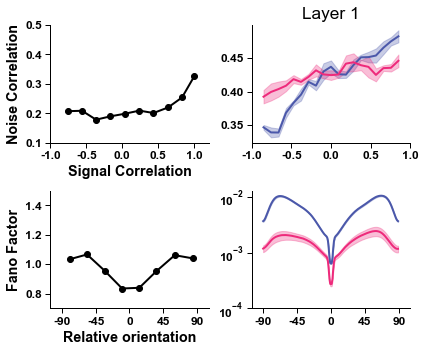

In [44]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

plt.sca(ax[0,0])
plot(Signal_Noise_previous[:,0], Signal_Noise_previous[:,1], color='k',fmt='-o')
ax[0,0].set_xlim([-1.0, 1.2])
ax[0,0].set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax[0,0].set_ylim([0.1,0.5])
ax[0,0].set_ylabel("Noise Correlation")
ax[0,0].set_xlabel("Signal Correlation")
plt.sca(ax[0,1])
ax[0,1].plot(bin_centers, SingleNoiseCorrelation_pre_mean[0], label=['Pre-test'],c=ryzcolor(0))
ax[0,1].fill_between(bin_centers,SingleNoiseCorrelation_pre_mean[0]-SingleNoiseCorrelation_pre_se[0],
                    SingleNoiseCorrelation_pre_mean[0]+SingleNoiseCorrelation_pre_se[0], color=C0_alpha)
ax[0,1].plot(bin_centers, SingleNoiseCorrelation_post_mean[0], label=['Post-test'],c=ryzcolor(1))
ax[0,1].fill_between(bin_centers,SingleNoiseCorrelation_post_mean[0]-SingleNoiseCorrelation_post_se[0],
                    SingleNoiseCorrelation_post_mean[0]+SingleNoiseCorrelation_post_se[0], color=C1_alpha)
ax[0,1].set_title("Layer 1")
# ax[0,1].set_yticks([0.30, 0.40, 0.50])
ax[0,1].set_xlim([-1.0, 1.0])
ax[0,1].set_xticks([-1.0,-0.5, 0.0, 0.5, 1.0])

plt.sca(ax[1,0])
plot(FF_previous[:,0], FF_previous[:,1], color='k',fmt='-o')
ax[1,0].set_xlim([-105,105])
ax[1,0].set_xticks([-90,-45,0,45,90])
ax[1,0].set_yticks([0.8,1.0,1.2,1.4])
ax[1,0].set_ylim([0.7,1.5])
ax[1,0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[1,0].set_ylabel("Fano Factor")
ax[1,0].set_xlabel("Relative orientation")
plt.sca(ax[1,1])
ax[1,1].plot(np.arange(0,180,1), FF_property_pre_mean[0], label=['Pre-test'],c=ryzcolor(0))
ax[1,1].fill_between(np.arange(0,180,1),FF_property_pre_mean[0]-FF_property_pre_se[0],
                    FF_property_pre_mean[0]+FF_property_pre_se[0], color=C0_alpha)
ax[1,1].plot(np.arange(0,180,1), FF_property_post_mean[0], label=['Post-test'],c=ryzcolor(1))
ax[1,1].fill_between(np.arange(0,180,1),FF_property_post_mean[0]-FF_property_post_se[0],
                    FF_property_post_mean[0]+FF_property_post_se[0], color=C1_alpha)
ax[1,1].set_xlim([-15,195])
ax[1,1].set_xticks([0,45,90,135,180])
ax[1,1].set_yscale('log')
ax[1,1].set_xticklabels(['-90','-45','0','45','90'])
ax[1,1].minorticks_off()
ax[1,1].set_yticks([1e-4, 1e-3, 1e-2])
plt.savefig("FigS2_1.pdf")

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


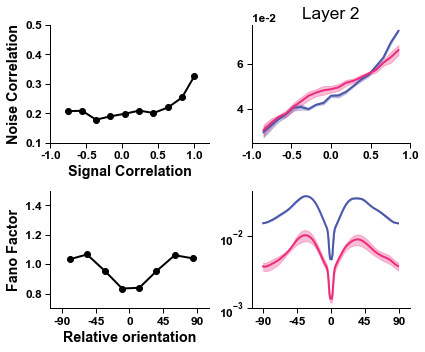

In [45]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

fig, ax = plt.subplots(2, 2, figsize=(6, 5))

plt.sca(ax[0,0])
plot(Signal_Noise_previous[:,0], Signal_Noise_previous[:,1], color='k',fmt='-o')
ax[0,0].set_xlim([-1.0, 1.2])
ax[0,0].set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax[0,0].set_ylim([0.1,0.5])
ax[0,0].set_ylabel("Noise Correlation")
ax[0,0].set_xlabel("Signal Correlation")
plt.sca(ax[0,1])
ax[0,1].plot(bin_centers, SingleNoiseCorrelation_pre_mean[1], label=['Pre-test'],c=ryzcolor(0))
ax[0,1].fill_between(bin_centers,SingleNoiseCorrelation_pre_mean[1]-SingleNoiseCorrelation_pre_se[1],
                    SingleNoiseCorrelation_pre_mean[1]+SingleNoiseCorrelation_pre_se[1], color=C0_alpha)
ax[0,1].plot(bin_centers, SingleNoiseCorrelation_post_mean[1], label=['Post-test'],c=ryzcolor(1))
ax[0,1].fill_between(bin_centers,SingleNoiseCorrelation_post_mean[1]-SingleNoiseCorrelation_post_se[1],
                    SingleNoiseCorrelation_post_mean[1]+SingleNoiseCorrelation_post_se[1], color=C1_alpha)
ax[0,1].set_title("Layer 2")
# ax[0,1].set_ylim([0.4,0.6])
# ax[0,1].set_yticks([0.40, 0.50, 0.60])
ax[0,1].ticklabel_format(style="sci", scilimits=(0,0), axis='y')
ax[0,1].set_xlim([-1.0, 1.0])
ax[0,1].set_xticks([-1.0,-0.5, 0.0, 0.5, 1.0])

plt.sca(ax[1,0])
plot(FF_previous[:,0], FF_previous[:,1], color='k',fmt='-o')
ax[1,0].set_xlim([-105,105])
ax[1,0].set_xticks([-90,-45,0,45,90])
ax[1,0].set_yticks([0.8,1.0,1.2,1.4])
ax[1,0].set_ylim([0.7,1.5])
ax[1,0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax[1,0].set_ylabel("Fano Factor")
ax[1,0].set_xlabel("Relative orientation")
plt.sca(ax[1,1])
ax[1,1].plot(np.arange(0,180,1), FF_property_pre_mean[1], label=['Pre-test'],c=ryzcolor(0))
ax[1,1].fill_between(np.arange(0,180,1),FF_property_pre_mean[1]-FF_property_pre_se[1],
                    FF_property_pre_mean[1]+FF_property_pre_se[1], color=C0_alpha)
ax[1,1].plot(np.arange(0,180,1), FF_property_post_mean[1], label=['Post-test'],c=ryzcolor(1))
ax[1,1].fill_between(np.arange(0,180,1),FF_property_post_mean[1]-FF_property_post_se[1],
                    FF_property_post_mean[1]+FF_property_post_se[1], color=C1_alpha)
ax[1,1].set_xlim([-15,195])
ax[1,1].set_xticks([0,45,90,135,180])
ax[1,1].set_yscale('log')
ax[1,1].set_xticklabels(['-90','-45','0','45','90'])
ax[1,1].minorticks_off()
ax[1,1].set_yticks([1e-3, 1e-2])
plt.savefig("FigS2_2.pdf")